<h1><center>Influence des paramètres - C et Gamma</center></h1>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DiouaneAbdallah/influence-Hyperparametres-SVM-avec-des-visualisations/blob/main/InfluenceDesParamètresSVM-CetGamma.ipynb)

## importation des bibliothèques

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import numpy as np
from sklearn.svm import SVC

## Définition des fonctions utilisés pour visualiser les régions de décision.

In [53]:
def plot_regions_decision(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')

def plot_model(gamma, c):
    svm = SVC(kernel='rbf', random_state=0, gamma=gamma, C=c)
    svm.fit(X_xor, y_xor)
    
    plt.figure(figsize=(10,5))
    plot_regions_decision(X_xor, y_xor, classifier=svm)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

## Générer des données

**Nous générons ici des données non linéairement séparables avec lesquelles nous allons entraîner notre classifieur.**

**Il existe deux classes dans notre dataset: les croix bleus et les carrés rouges.**

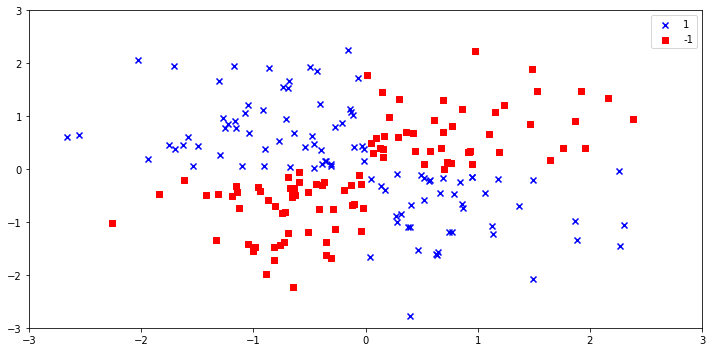

In [51]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.figure(figsize=(10,5))

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### En utilisant un classifieur lineaire

**La façon la plus simple d'utiliser un SVC est avec un classifieur linéaire, ce qui nous donnes que la limite de décision est une ligne droite (ou hyperplan pour des dimensions plus élevées). Les classifieurs linéaires sont rarement utilisés dans la pratique, Comme on peut le voir, la classification n’est pas très bonne (ce qui peut être vu par tous les croix bleus dans la région rouge) car les données ne sont pas linéairement separables.**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


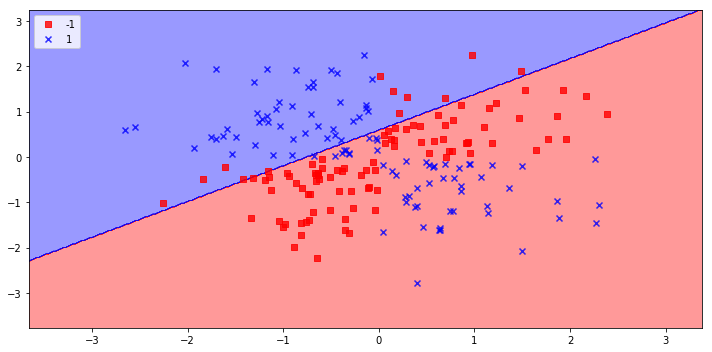

In [54]:
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_xor, y_xor)
    
plt.figure(figsize=(10,5))

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Pour voir l'influence des parametres d'un classifieur SVM, on va entrainer un model avec un noyau gaussien.

### il est  important de savoir qu'un classifieur utilisant un noyau gaussien a plus de deux paramètres, mais nous allons voir que l'inflence de deux : 
<h2>
    <lu>
        <li><font color="#004">gamma</font></li> 
        <li><font color="#004">C</font></li>
    </lu>
</h2>

# Gamma

**Gamma est le paramètre du noyau gaussien(RBF) qui peut être considéré comme la "propagation" de la région de décision. 
gamma définit l’influence d’une seule point :**
- **Lorsque le gamma est faible, la «courbe» de la limite de décision est très basse et la région de décision est donc très large.**
- **Lorsque le gamma est élevé, la «courbe» de la limite de décision est élevée, ce qui crée des îlots de limites de décision autour des points de données. Nous verrons cela très clairement ci-dessous.**



<p style="color:black;"><b>Dans les quatre graphiques que on va voir, nous appliquons le même classifieur avec un noyeau gaussien aux mêmes données tout en maintenant C constant. La seule différence est que chaque fois nous augmenterons la valeur du gamma. Ce faisant, nous pouvons voir visuellement l’effet du gamma sur la région de décision.</b></p>

### Gamma = 0.01

**lorsqu’on utilise une valeur de gamma faible tel que 0,01, la limite de décision n’est pas très «courbée», c’est plutôt un grand arc de cercle.**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


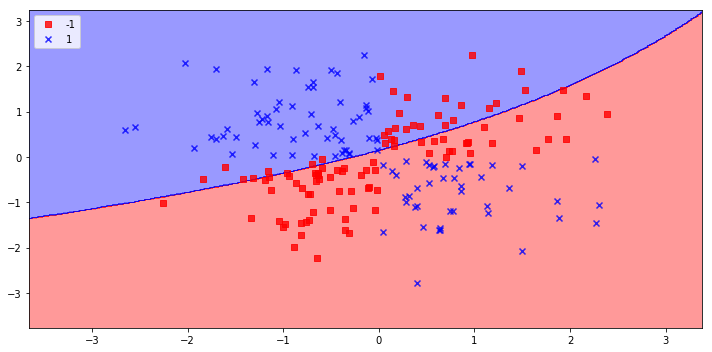

In [41]:
plot_model(gamma=0.01, c=1)

### Gamma = 1

**Vous pouvez voir une grande différence lorsque nous augmentons la valeur de gamma à 1. Maintenant, la limite de décision commence à mieux séparer nos données.**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


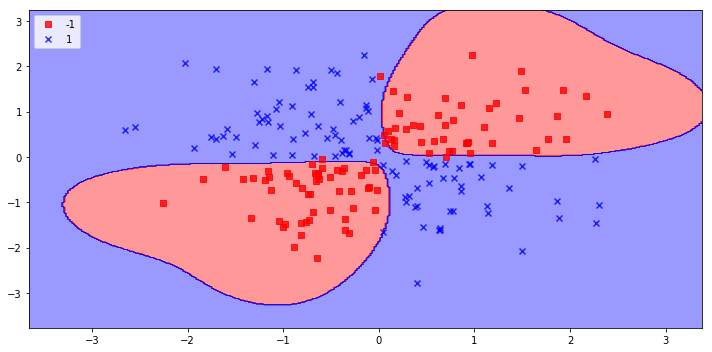

In [42]:
plot_model(gamma=1, c=1)

### Gamma = 10

**À gamma = 10, La limite de décision commence à être fortement affectée par des points de données individuels.**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


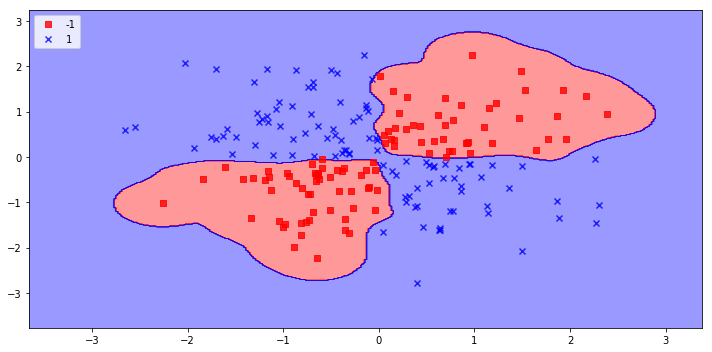

In [43]:
plot_model(gamma=10, c=1)

### Gamma = 100

**Avec une valeur de gamma élevée, la limite de décision dépend presque entièrement de points de données individuels, créant des «Petites îles». ici on voit clairement le probleme de l' overfitting.**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


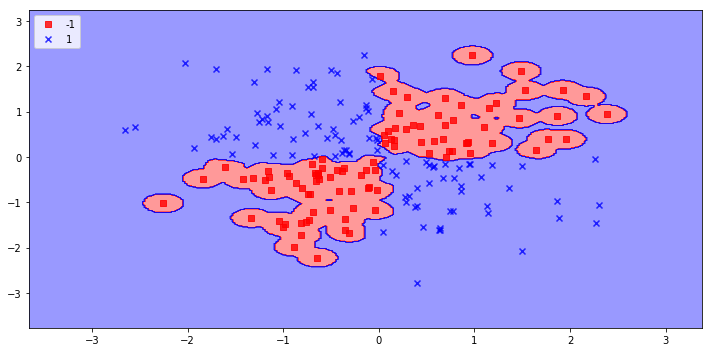

In [44]:
plot_model(gamma=100, c=1)

## Le paramètre C

**Un SVM cherche à trouver une marge qui sépare toutes les donnees de la classe positif et de la classe négatif. Toutefois, cela peut conduire à des modèles mal ajustés si certaines donnees sont mal classifiées ou s'il s'agit de bruit. Pour en tenir compte, on a l'idée d'une SVM à «marge souple» qui permet à certaines donnees d'être «ignorés» ou placés du mauvais côté de la marge; cette idée conduit souvent à un meilleur ajustement global.**

**C est le paramètre qui contrôle l’influence de chaque vecteur de support individuel; Ce processus implique une pénalité d'erreur en échange pour la stabilité.**

**Un faible valeur C rend la surface de décision lisse, alors que l'augmentation de la valeur de C vise à classer correctement tous les exemples d'apprentissage.**

### C = 1

**Avec C = 1, le classifieur est clairement tolérant des points de données mal classés. Il y a beaucoup de points rouges dans la région bleue et des points bleus dans la région rouge.**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


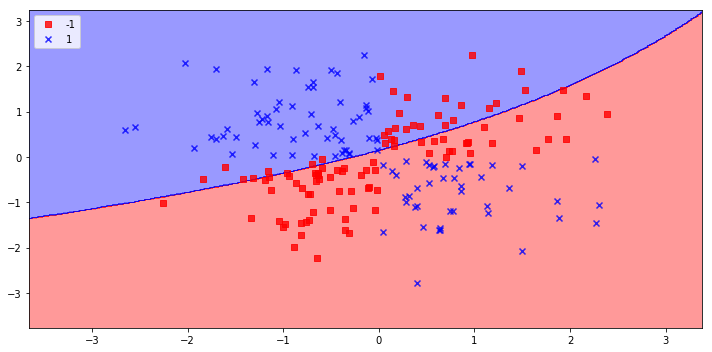

In [112]:
plot_model(gamma=0.01, c=1)

### C = 10

**Avec C = 10, le classifieur est moins tolérant aux points de données mal classés et la limite de décision est donc plus stricte.**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


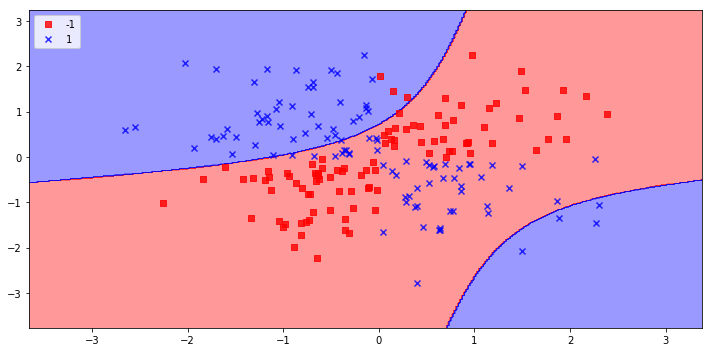

In [46]:
plot_model(gamma=0.01, c=10)

### C = 1000

**Lorsque C = 1000, le classifieur commence à devenir très intolérant aux points de données mal classés et ainsi la limite de décision devient moins biaisée et présente une plus grande variance (c'est-à-dire plus dépendante des points de données individuels).**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


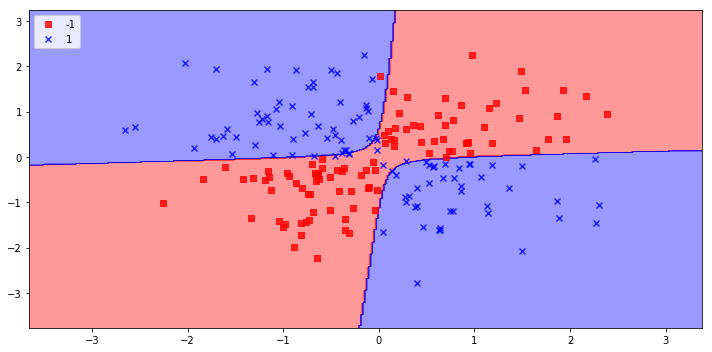

In [47]:
plot_model(gamma=0.01, c=1000)

### C = 10000

**À C = 10000, le classifieur essaie vraiment fort pour ne pas classer les points de données de manière erronée et nous voyons des signes de l'overfitting.**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


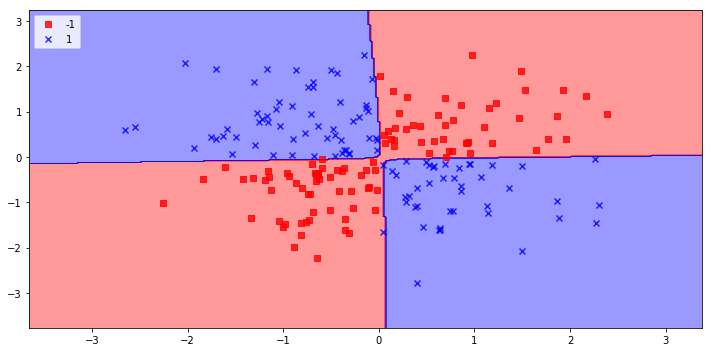

In [48]:

plot_model(gamma=0.01, c=10000)

### Chercher (gamma, C) optimal

In [118]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)

param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(random_state=0), param_grid=param_grid, cv=cv)
grid.fit(X_xor, y_xor)
    
print("les meilleurs paramètres sont %s avec un score de %0.2f"% (grid.best_params_, grid.best_score_))

les meilleurs paramètres sont {'C': 1000000.0, 'gamma': 0.01} avec un score de 0.99


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


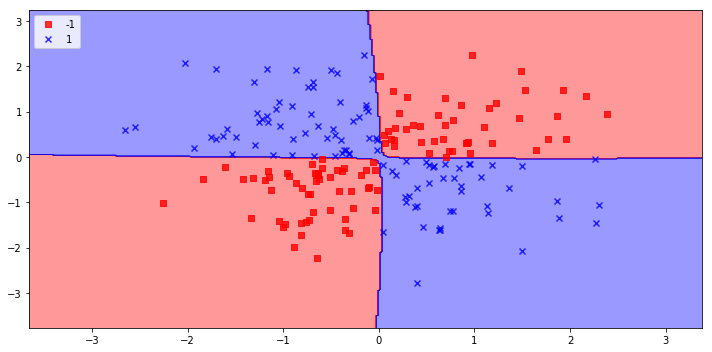

In [117]:
plot_model(gamma=0.01, c=1000000.0)